# mnist, fmnist, cifar10 순으로 간단한 CNN 모델의 성능(정확도)이 낮아지는 이유를 설명하시오.
- NN도 MNIST 용으로 철저히 계산된 네트워크이고, 데이터도 거기에 맞게 들어 있는 것입니다.
- mnist, fmnist, cifar10 순으로 데이터 구조가 복잡해지기 때문에 특징 벡터를 찾기 어려워서 일 것 같습니다.
- 학습 데이터 셋이 부족하기 때문입니다.

---


## 정확도를 높이기 위해선
- 많은 데이터가 필요
> 딥러닝은 데이터가 많을 수록 좋은 성능을 보이게 됩니다. 

- 데이터 생성해보기
> 특정한 데이터에 과적합되지 않고 일반적인 특징을 학습시키기 위해서는 데이터를 생성해서 학습시켜야합니다. 일부러 데이터를 일그러뜨리는 등의 방식으로 데이터를 생성해서 일반적인 특징을 학습시켜봐야한다.

- 데이터를 rescale해보기
> 우리는 코끼리가 어떻게 생긴지 알려면 너무 가까이서 보면 안되고, 적당한 거리에서 보아야합니다. 이처럼 인공지능에게 데이터를 학습시킬 때, 항상 적당한 거리에서 데이터를 학습시키기 위해 데이터를 rescale 해야합니다.

- 데이터를 변형해보기
> 지금까지 학습에 사용된 데이터 외에 다른 정보를 추가하거나 다른 방법으로 pre process 처리를 하는 등 데이터를 변형해봐야한다.

# cifar10 데이터에 대한 분류 정확도가 높은 모델을 만드는 방법과 최적 모델을 구하시오.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [ ]:
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**


In [ ]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

25366


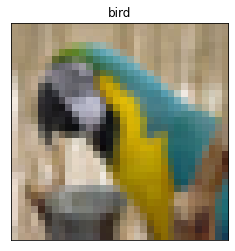

In [ ]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

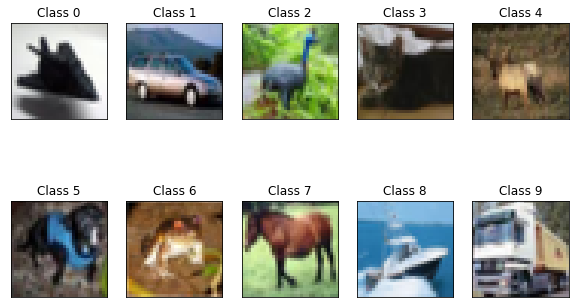

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization

In [ ]:
cifar10_cnn = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',kernel_regularizer=l2(0.0001),
    activation='relu'),
    BatchNormalization(),
    
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 32,padding='same', kernel_regularizer=l2(0.0001), activation='relu'),
    BatchNormalization(),

    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    keras.layers.Dropout(0.2), 

    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same', kernel_regularizer=l2(0.0001), activation='relu'),
    BatchNormalization(),

    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same', kernel_regularizer=l2(0.0001), activation='relu'),
    BatchNormalization(),

    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    keras.layers.Dropout(0.3), 

    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same', kernel_regularizer=l2(0.0001), activation='relu'),
    BatchNormalization(),

    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same', kernel_regularizer=l2(0.0001), activation='relu'),
    BatchNormalization(),

    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    keras.layers.Dropout(0.4), 

    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
cifar10_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
cifar10_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [ ]:
hist = cifar10_cnn.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5066 - accuracy: 0.9010 - val_loss: 0.7209 - val_accuracy: 0.8446
Epoch 2/500
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5046 - accuracy: 0.9010 - val_loss: 0.7631 - val_accuracy: 0.8377
Epoch 3/500
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5027 - accuracy: 0.9034 - val_loss: 0.7180 - val_accuracy: 0.8468
Epoch 4/500
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4934 - accuracy: 0.9054 - val_loss: 0.7490 - val_accuracy: 0.8410
Epoch 5/500
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4984 - accuracy: 0.9051 - val_loss: 0.7315 - val_accuracy: 0.8425
Epoch 6/500
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4968 - accuracy: 0.9055 - val_loss: 0.7410 - val_accuracy: 0.8397
Epoch 7/500
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4916 - accuracy: 0.9060 - val_loss: 0.7319 - 

In [ ]:
cifar10_cnn.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.7457 - accuracy: 0.8535


[0.7456672191619873, 0.8535000085830688]

In [ ]:
score=cifar10_cnn.evaluate(X_test, y_test, batch_size = 32)
losses = score[0]
accuracies = score[1]
losses,accuracies

313/313 [==============================] - 1s 3ms/step - loss: 0.7457 - accuracy: 0.8535


(0.7456672191619873, 0.8535000085830688)

In [ ]:
cifar10_cnn.save('cifar10_cnn_best.hdf5')

In [ ]:
epoch = 77
hist = cifar10_cnn.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3966 - accuracy: 0.9348 - val_loss: 0.7392 - val_accuracy: 0.8511
Epoch 2/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3998 - accuracy: 0.9323 - val_loss: 0.7307 - val_accuracy: 0.8535
Epoch 3/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3984 - accuracy: 0.9338 - val_loss: 0.7694 - val_accuracy: 0.8453
Epoch 4/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4017 - accuracy: 0.9334 - val_loss: 0.7817 - val_accuracy: 0.8379
Epoch 5/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3952 - accuracy: 0.9343 - val_loss: 0.7056 - val_accuracy: 0.8551
Epoch 6/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3957 - accuracy: 0.9341 - val_loss: 0.7165 - val_accuracy: 0.8554
Epoch 7/77
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3948 - accuracy: 0.9337 - val_loss: 0.7315 - val_ac

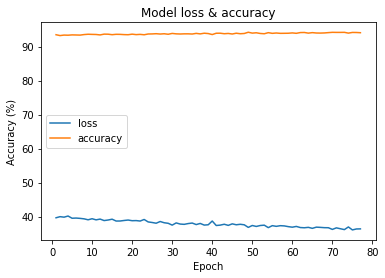

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

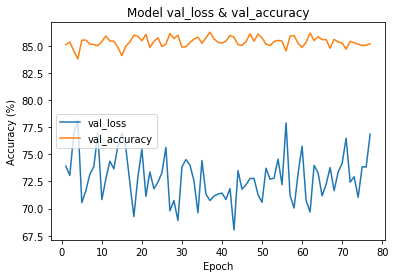

In [ ]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

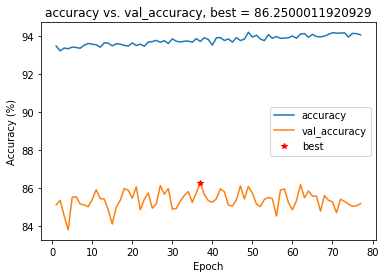

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
from keras.models import load_model

model = load_model('cifar10_best_weights.052-0.8608.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.7153 - accuracy: 0.8608


[0.715304970741272, 0.86080002784729]

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [ ]:
cm = confusion_matrix(y_test0, predictions0)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

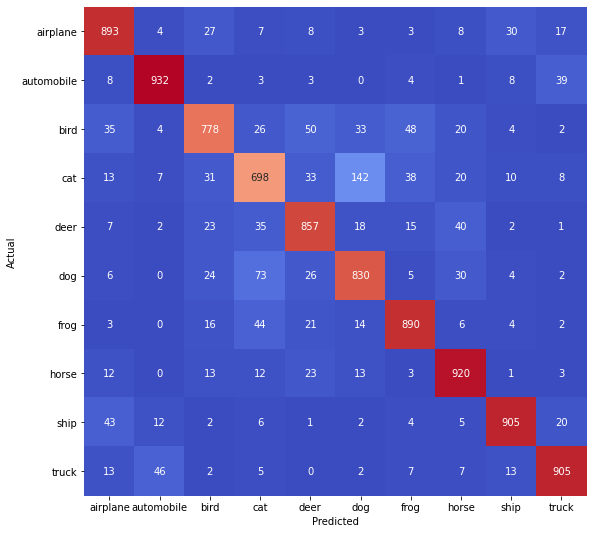

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()